# **1. Perkenalan Dataset**

Tahap pertama, mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:

    Dataset diperoleh dari sumber Kaggle https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

2. **Ketentuan Dataset**:

    Terdiri 2239 baris dan 26 kolom seperti "Income","Year_Birth","Gender","Marital_Status	",dll




# **2. Import Library**

In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import numpy as np # Operasi aritmetika
from sklearn.preprocessing import RobustScaler  # Mengimpor RobustScaler untuk normalisasi data
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data yang lebih cantik
from sklearn.preprocessing import LabelEncoder  # Mengimpor LabelEncoder untuk mengubah variabel kategorikal menjadi numerik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi
from sklearn.feature_selection import VarianceThreshold  # Mengimpor VarianceThreshold untuk memilih fitur berdasarkan variansi
from sklearn.ensemble import IsolationForest  # Mengimpor IsolationForest untuk mendeteksi outlier
from sklearn.preprocessing import MinMaxScaler  # Mengimpor MinMaxScaler untuk normalisasi data
from sklearn.model_selection import train_test_split  # Mengimpor train_test_split untuk membagi data menjadi data latih dan data uji
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from scipy.stats import zscore  # Mengimpor zscore untuk menghitung skor z-score
from mpl_toolkits.mplot3d import Axes3D  # Mengimpor Axes3D untuk visualisasi data 3D
from sklearn.impute import SimpleImputer  # Mengimpor SimpleImputer untuk mengatasi missing values
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk normalisasi data

# **3. Memuat Dataset**

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv' ,sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# 1. Memahami Struktur Data
print("Jumlah Baris dan Kolom:", df.shape)

# Informasi kolom dan tipe data
print(df.info())

Jumlah Baris dan Kolom: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Num

* Dt_Customer bersifat object maka harus diubah menjadi format datetime
* Missing values pada kolom Income

In [ ]:
# 2. Mengecek Data yang Hilang
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


* Terdapat 24 missing values pada kolom "Income"

In [ ]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [ ]:
# Menghapus kolom yang tidak relevan
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

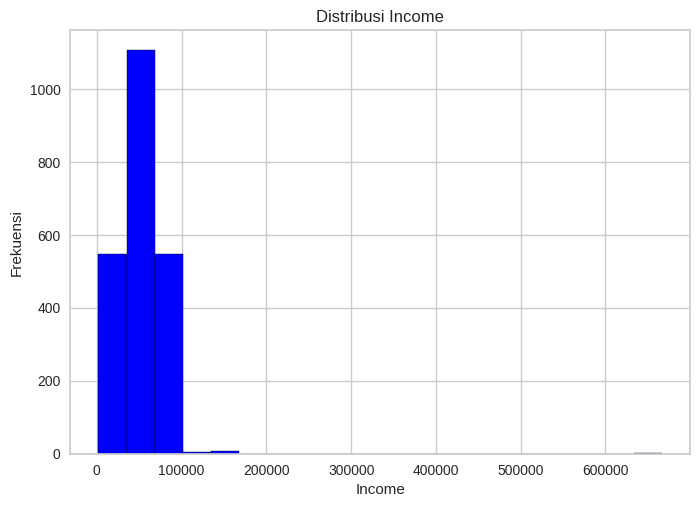

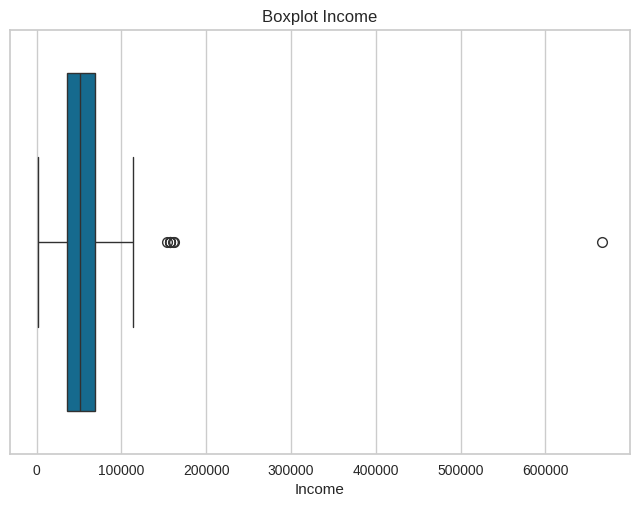

In [ ]:
# Histogram
df['Income'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot
sns.boxplot(x=df['Income'])
plt.title('Boxplot Income')
plt.show()

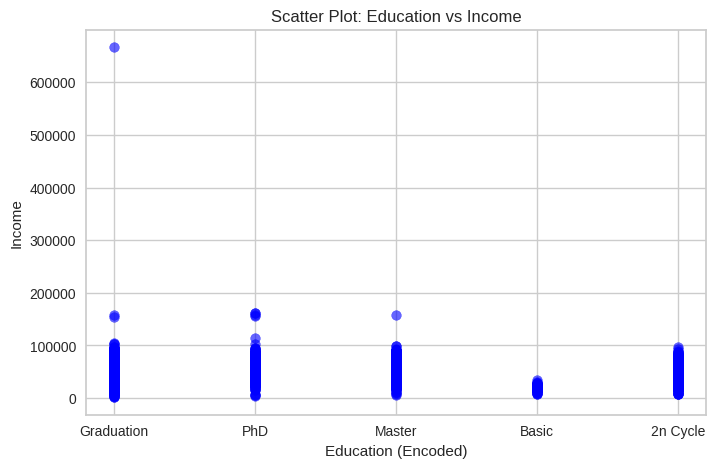

In [ ]:
# Scatter plot antara Education dan Income
plt.figure(figsize=(8, 5))
plt.scatter(df['Education'], df['Income'], alpha=0.6, color='blue')
plt.title('Scatter Plot: Education vs Income')
plt.xlabel('Education (Encoded)')
plt.ylabel('Income')
plt.grid(True)
plt.show()

* Terdapat outlier di Income

<ipython-input-622-46d816e51c92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='viridis')


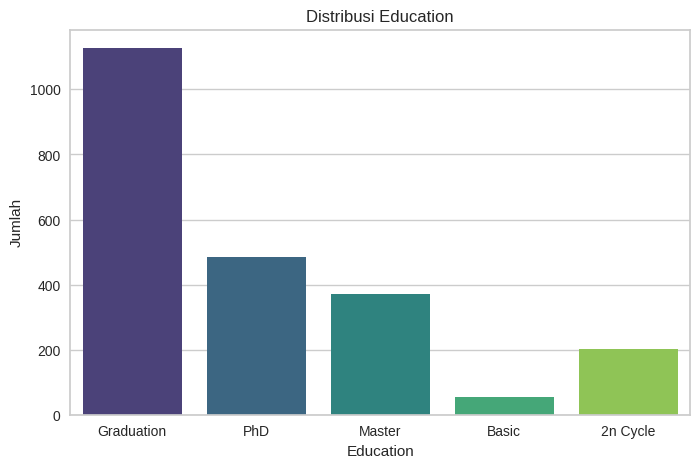

In [ ]:
# 4. Visualisasi Data
# Diagram batang untuk variabel 'Education'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Education', palette='viridis')
plt.title('Distribusi Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.show()



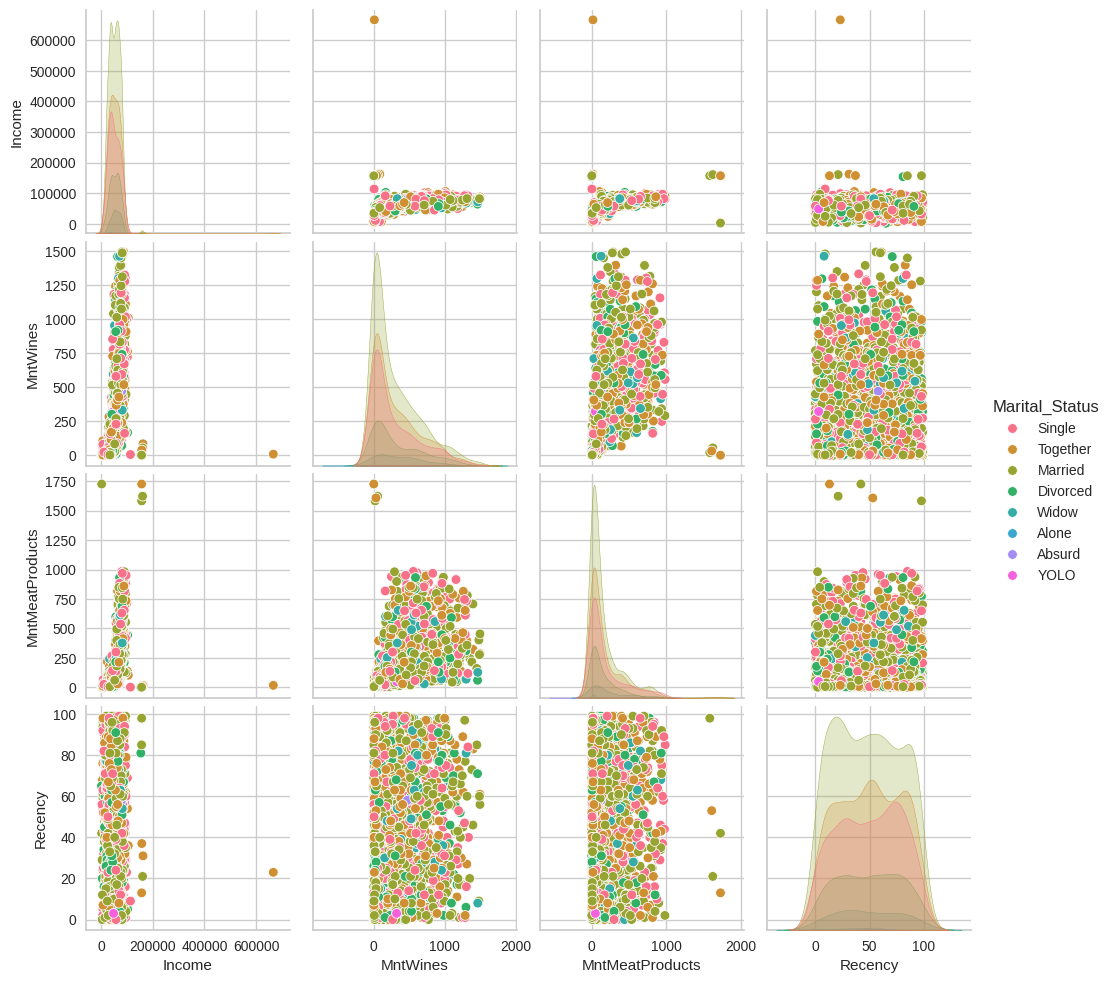

In [ ]:
# Pairplot untuk beberapa variabel numerik
sns.pairplot(df, vars=['Income', 'MntWines', 'MntMeatProducts', 'Recency'], hue='Marital_Status')
plt.show()


In [ ]:
# Menangani Missing value pada kolom Income dengan rata rata = df['Income'].mean()
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

,0
ID,False
Year_Birth,False
Education,False
Marital_Status,False
Income,False
Kidhome,False
Teenhome,False
Dt_Customer,False
Recency,False
MntWines,False


In [ ]:
# mengecek value dari kolom 'Marital_Status'
df['Marital_Status'].value_counts(),df['Education'].value_counts()

(Marital_Status
 Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: count, dtype: int64,
 Education
 Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: count, dtype: int64)

In [ ]:
# Menggabungkan nilai kolom 'Marital_Status'
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Married'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'Widow','YOLO','Absurd','Alone','Divorced'], 'Single')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Menggabungkan kerangka data yang berbeda ke dalam satu kolom untuk mengurangi jumlah dimensi
df['Kids']=df['Kidhome']+df['Teenhome']
df['Expenses']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['Complain']=df['Complain']+df['Response']

In [ ]:
# menambahkan kolom "Age" ke dalam DataFrame untuk menunjukkan usia pelanggan, yang dihitung dengan mengurangkan tahun kelahiran (kolom "Year_Birth") dari tahun 2015.
df['Age'] = 2015 - df['Year_Birth']

# Menghitung Jumlah hari pelanggan terlibat dengan perusahaan dan Mengubah Dt_customer menjadi format timestamp
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [ ]:
# Menghapus beberapa kolom untuk mengurangi dimensi dan kompleksitas model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds","first_day"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,5524,1957,PG,Single,58138.0,2012-09-04,58,1,0,1617,0,25,58,849
1,2174,1954,PG,Single,46344.0,2014-03-08,38,0,2,27,0,6,61,299
2,4141,1965,PG,Relationship,71613.0,2013-08-21,26,0,0,776,0,21,50,498
3,6182,1984,PG,Relationship,26646.0,2014-02-10,26,0,1,53,0,8,31,325
4,5324,1981,PG,Relationship,58293.0,2014-01-19,94,0,1,422,0,19,34,347


In [ ]:
# Mengubah kolom Education dengan value PostGraduate 'PG' dan UnderGraduate 'UG'
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Marital_Status     2240 non-null   object        
 4   Income             2240 non-null   float64       
 5   Dt_Customer        2240 non-null   datetime64[ns]
 6   Recency            2240 non-null   int64         
 7   Complain           2240 non-null   int64         
 8   Kids               2240 non-null   int64         
 9   Expenses           2240 non-null   int64         
 10  TotalAcceptedCmp   2240 non-null   int64         
 11  NumTotalPurchases  2240 non-null   int64         
 12  Age                2240 non-null   int64         
 13  day_engaged        2240 non-null   int64         
dtypes: datet

# **4. Exploratory Data Analysis (EDA)**

Text(0.5, 0, 'Marital Status')

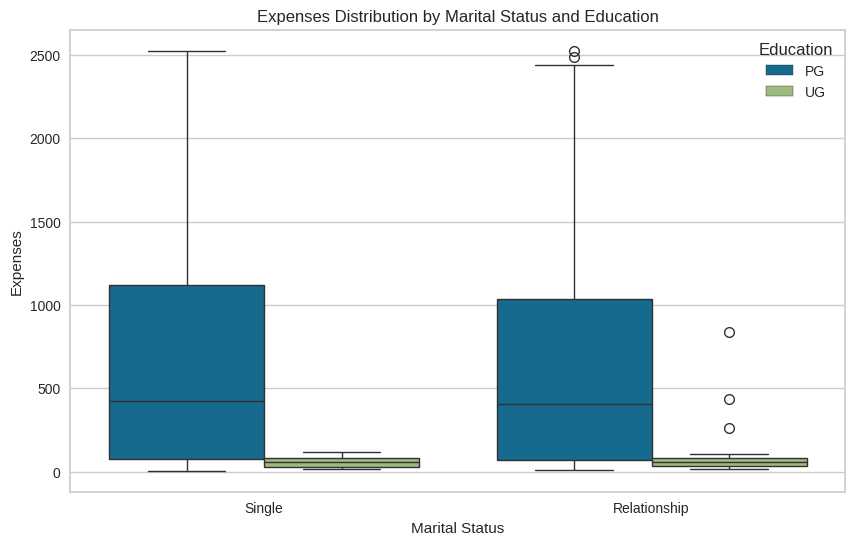

In [ ]:
# Menunjukkan distribusi total pengeluaran (Expenses) berdasarkan status pernikahan (Marital_Status) berdasarkan Education
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Expenses', hue='Education', data=df)
plt.title('Expenses Distribution by Marital Status and Education')
plt.xlabel('Marital Status')

In [ ]:
scaler = RobustScaler()
df['Expenses'] = scaler.fit_transform(df[['Expenses']])

Text(0, 0.5, 'Income')

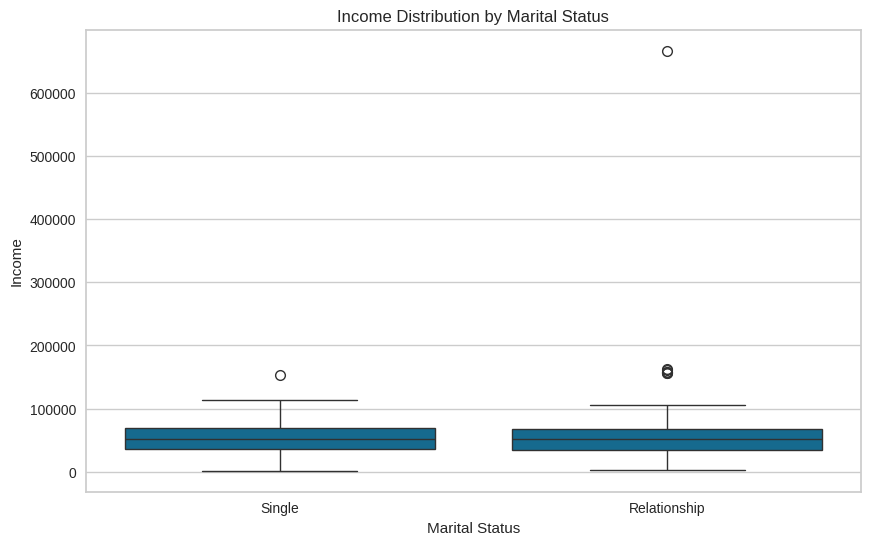

In [ ]:
# Menampilkan Total Income berdasarkan Marital_Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')

In [ ]:
df['Income'] = scaler.fit_transform(df[['Income']])
# Hitung nilai median dari kolom 'income'
median_income = df['Income'].median()

# Ganti nilai income yang lebih dari 2.000.000 dengan median
df.loc[df['Income'] > 2000000, 'Income'] = median_income


Text(0.5, 0, 'NumTotalPurchases')

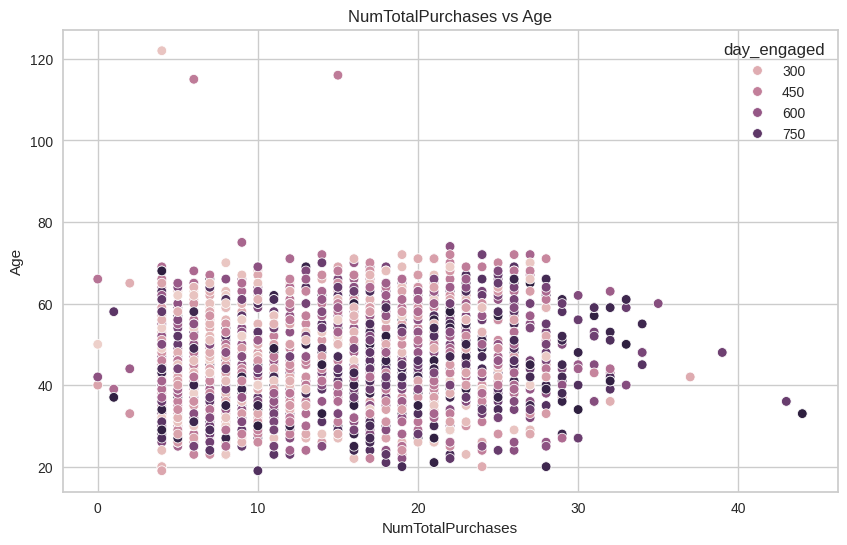

In [ ]:
# Menampilkan NumTotalPurchases	vs Age berdasarkan	day_engaged
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumTotalPurchases', y='Age', hue='day_engaged', data=df)
plt.title('NumTotalPurchases vs Age')
plt.xlabel('NumTotalPurchases')

In [ ]:
# menampilkan Statistik deskriptif
df.describe()

,ID,Year_Birth,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.015442,2013-07-10 10:01:42.857142784,49.109375,0.158482,0.950446,0.214792,0.297768,14.862054,46.194196,539.582143
min,0.000000,1893.000000,-1.527022,2012-07-30 00:00:00,0.000000,0.000000,0.000000,-0.400307,0.000000,0.000000,19.000000,186.000000
25%,2828.250000,1959.000000,-0.494725,2013-01-16 00:00:00,24.000000,0.000000,0.000000,-0.335040,0.000000,8.000000,38.000000,366.750000
50%,5458.500000,1970.000000,0.000000,2013-07-08 12:00:00,49.000000,0.000000,1.000000,0.000000,0.000000,15.000000,45.000000,541.500000
75%,8427.750000,1977.000000,0.505275,2013-12-30 06:00:00,74.000000,0.000000,1.000000,0.664960,0.000000,21.000000,56.000000,715.000000
max,11191.000000,1996.000000,18.775747,2014-06-29 00:00:00,99.000000,2.000000,3.000000,2.179678,4.000000,44.000000,122.000000,885.000000
std,3246.662198,11.984069,0.764490,NaN,28.962453,0.368924,0.751803,0.616585,0.678381,7.677173,11.984069,202.122512


# **5. Data Preprocessing**

In [ ]:
# Menggunakan label encoder pada kolom 'Education' dan 'Marital_Status
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,5524,1957,0,1,0.195307,2012-09-04,58,1,0,1.250064,0,25,58,849
1,2174,1954,0,1,-0.164804,2014-03-08,38,0,2,-0.377783,0,6,61,299
2,4141,1965,0,0,0.606745,2013-08-21,26,0,0,0.389045,0,21,50,498
3,6182,1984,0,0,-0.766251,2014-02-10,26,0,1,-0.351165,0,8,31,325
4,5324,1981,0,0,0.200040,2014-01-19,94,0,1,0.026619,0,19,34,347


In [ ]:
# Binning pada kolom Income
# Menentukan bins untuk income
income_bins = [0, 25000, 50000, 100000, 150000]  # Rentang income
income_labels = ['Low', 'Medium', 'High', 'Very High']  # Labels untuk tiap bin

# Menggunakan qcut untuk membagi data menjadi 4 bagian yang sama
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Tampilkan hasil
print(df[['Income', 'Income_Group']].head())

     Income Income_Group
0  0.195307         High
1 -0.164804       Medium
2  0.606745    Very High
3 -0.766251          Low
4  0.200040         High


In [ ]:
# Membuat binning
bins = [13, 19, 35, 50, 65, 120]
labels = ['Teenager', 'Young Adult', 'Adult', 'Senior', 'Elderly']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

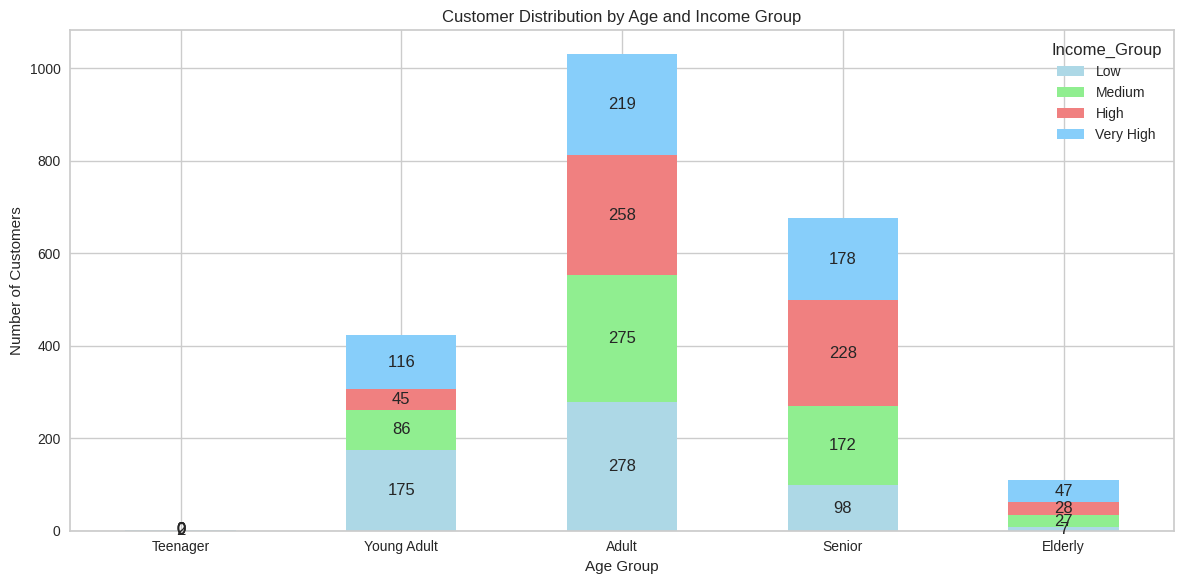

In [ ]:
# Menghitung jumlah pelanggan untuk setiap grup Age dan Income
age_income_counts = pd.crosstab(df['Age_Group'], df['Income_Group'])

# Membuat Stacked Bar Chart
age_income_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

# Menambahkan title dan label
plt.title("Customer Distribution by Age and Income Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap segmen dalam bar
for i in range(len(age_income_counts)):
    for j in range(len(age_income_counts.columns)):
        plt.text(i, age_income_counts.iloc[i, :j+1].sum() - (age_income_counts.iloc[i, j] / 2),
                 str(age_income_counts.iloc[i, j]), ha='center', va='center')

# Menampilkan plot
plt.xticks(rotation=0)  # Agar label sumbu X tidak miring
plt.tight_layout()
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
# Membuat dataframe baru
df1 = df.copy()

In [ ]:
# Pisahkan kolom bertipe numerik dan Timestamp
numeric_columns = df1.select_dtypes(include=['number']).columns
timestamp_columns = df1.select_dtypes(include=['datetime']).columns

# Ubah kolom Timestamp menjadi numerik (misalnya dalam bentuk timestamp)
for col in timestamp_columns:
    df1[col] = df1[col].astype(int) / 10**9  # Ubah menjadi detik sejak epoch

# Lakukan scaling pada kolom numerik
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[numeric_columns])

# Gabungkan kembali hasil scaling dengan kolom lainnya
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=numeric_columns)
final_df = pd.concat([scaled_features_df, df1.drop(columns=numeric_columns)], axis=1)

# Tampilkan hasil
print(final_df.head())

         ID  Year_Birth  Education  Marital_Status    Income   Recency  \
0 -0.020999   -0.985345  -0.157171        1.346874  0.235327  0.307039   
1 -1.053058   -1.235733  -0.157171        1.346874 -0.235826 -0.383664   
2 -0.447070   -0.317643  -0.157171       -0.742460  0.773633 -0.798086   
3  0.181716    1.268149  -0.157171       -0.742460 -1.022732 -0.798086   
4 -0.082614    1.017761  -0.157171       -0.742460  0.241519  1.550305   

   Complain      Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  \
0  2.281516 -1.264505  1.679417         -0.439037           1.320826   
1 -0.429675  1.396361 -0.961275         -0.439037          -1.154596   
2 -0.429675 -1.264505  0.282673         -0.439037           0.799685   
3 -0.429675  0.065928 -0.918094         -0.439037          -0.894025   
4 -0.429675  0.065928 -0.305254         -0.439037           0.539114   

        Age  day_engaged   Dt_Customer Income_Group    Age_Group  
0  0.985345     1.531185  1.346717e+09         High    

In [ ]:
# Memilih fitur tambahan untuk clustering
X = df[['Income', 'Marital_Status', 'Expenses']]

# Membagi data menjadi data pelatihan dan validasi
X_train, X_valid = train_test_split(X, test_size=0.2, random_state=42)

print(f"Data Pelatihan: {X_train.shape}")
print(f"Data Validasi: {X_valid.shape}")


Data Pelatihan: (1792, 3)
Data Validasi: (448, 3)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:, :-1])
X_valid_scaled = scaler.transform(X_valid.iloc[:, :-1])


In [ ]:
# Clustering dengan K-Means (menggunakan data pelatihan)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train)

# Prediksi label cluster untuk data pelatihan dan validasi
X_train['Cluster'] = kmeans.predict(X_train)
X_valid['Cluster'] = kmeans.predict(X_valid)

print(f"Prediksi Cluster untuk data pelatihan: {X_train['Cluster'].head()}")
print(f"Prediksi Cluster untuk data validasi: {X_valid['Cluster'].head()}")

Prediksi Cluster untuk data pelatihan: 792     2
1271    0
1538    3
668     1
1975    1
Name: Cluster, dtype: int32
Prediksi Cluster untuk data validasi: 324     2
96      2
2104    1
1259    3
1061    3
Name: Cluster, dtype: int32


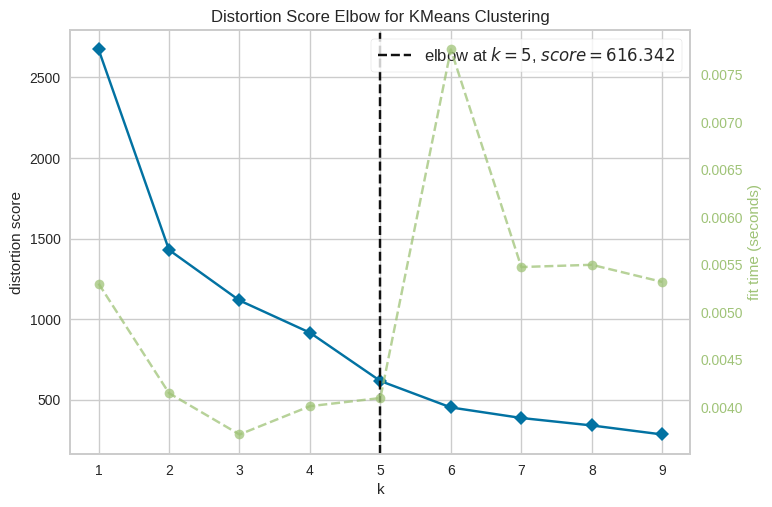

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **b. Evaluasi Model Clustering**

In [ ]:
# Analisis Distribusi Cluster pada Data Pelatihan
print("\nDistribusi Cluster pada Data Pelatihan:")
print(X_train['Cluster'].value_counts())

# Analisis Distribusi Cluster pada Data Validasi
print("\nDistribusi Cluster pada Data Validasi:")
print(X_valid['Cluster'].value_counts())




Distribusi Cluster pada Data Pelatihan:
Cluster
1    711
3    459
2    358
0    264
Name: count, dtype: int64

Distribusi Cluster pada Data Validasi:
Cluster
1    157
3    117
2     97
0     77
Name: count, dtype: int64


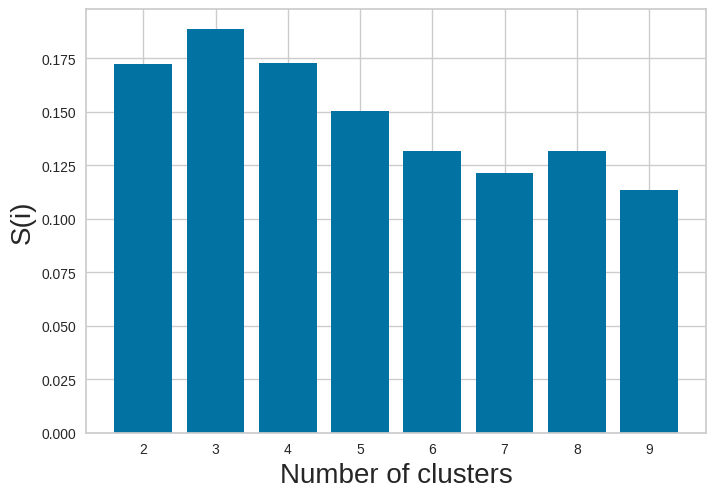

In [ ]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()


In [ ]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is: {silhouette_avg}")


For n_clusters = 2, the average silhouette_score is: 0.6072248735783873
For n_clusters = 3, the average silhouette_score is: 0.5888733531357353
For n_clusters = 4, the average silhouette_score is: 0.5926364025816111
For n_clusters = 5, the average silhouette_score is: 0.5585695491086374
For n_clusters = 6, the average silhouette_score is: 0.561817404361769
For n_clusters = 7, the average silhouette_score is: 0.5433347240163382
For n_clusters = 8, the average silhouette_score is: 0.5375040737786514
For n_clusters = 9, the average silhouette_score is: 0.5306509871335333
For n_clusters = 10, the average silhouette_score is: 0.5451822179226335


## **c. Feature Selection (Opsional)**

## **d. Visualisasi Hasil Clustering**

In [ ]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    print(f"k={k}, Silhouette Score: {score:.2f}")


k=2, Silhouette Score: 0.44
k=3, Silhouette Score: 0.60
k=4, Silhouette Score: 0.66
k=5, Silhouette Score: 0.59
k=6, Silhouette Score: 0.60
k=7, Silhouette Score: 0.54
k=8, Silhouette Score: 0.52
k=9, Silhouette Score: 0.52
k=10, Silhouette Score: 0.50


In [ ]:
# Inisialisasi list untuk menyimpan hasil
inertia = []
silhouette_scores = []

# Iterasi untuk berbagai jumlah cluster
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

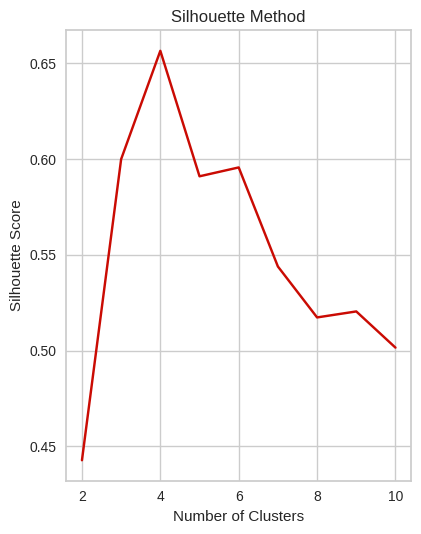

In [ ]:
# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

In [ ]:
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso.fit_predict(X_train_scaled)
X_train_filtered = X_train[outlier_labels == 1]

In [ ]:
# K-Means dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)  # Pastikan menggunakan data yang sudah di-scaling

# Menambahkan label cluster ke dataset
X_train['Cluster'] = kmeans.labels_

# Lihat distribusi data di setiap cluster
print(X_train['Cluster'].value_counts())


Cluster
1    610
3    560
2    343
0    279
Name: count, dtype: int64


In [ ]:
pca = PCA(n_components=2)  # Kurangi ke 2 dimensi untuk memudahkan visualisasi
X_train_pca = pca.fit_transform(X_train_scaled)

# Jalankan K-Means pada data yang sudah direduksi dimensinya
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_pca)

KMeans(n_clusters=4, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

silhouette_avg = silhouette_score(X_train_scaled, kmeans.labels_)
print(f"Silhouette Score untuk 4 cluster: {silhouette_avg:.2f}")

Silhouette Score untuk 4 cluster: 0.59


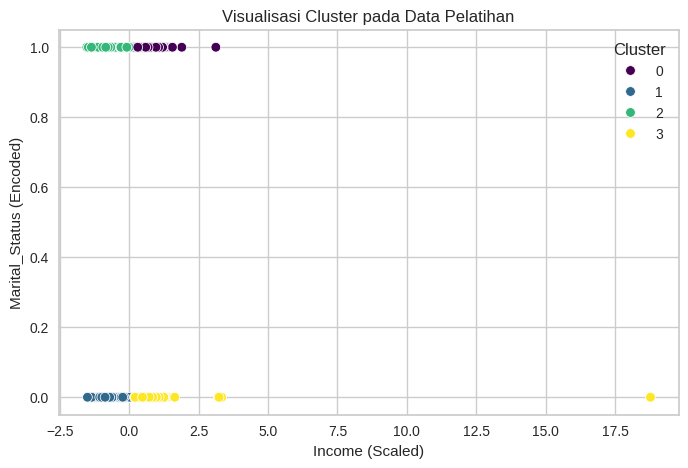

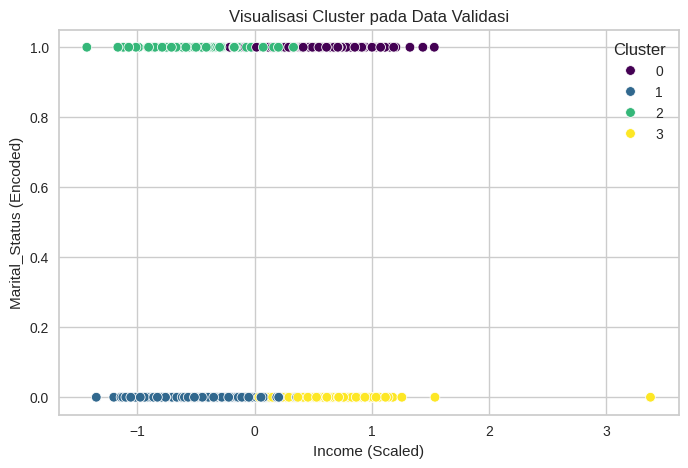


Interpretasi Cluster pada Data Pelatihan:

Cluster 0:
  Ukuran: 279
  Rata-rata Income: 0.61
  Rata-rata Marital_Status: 1.00

Cluster 1:
  Ukuran: 610
  Rata-rata Income: -0.52
  Rata-rata Marital_Status: 0.00

Cluster 2:
  Ukuran: 343
  Rata-rata Income: -0.49
  Rata-rata Marital_Status: 1.00

Cluster 3:
  Ukuran: 560
  Rata-rata Income: 0.59
  Rata-rata Marital_Status: 0.00


In [ ]:
# Visualisasi Cluster pada Data Pelatihan
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_train['Income'],
    y=X_train['Marital_Status'],
    hue=X_train['Cluster'],
    palette='viridis'
)
plt.title('Visualisasi Cluster pada Data Pelatihan')
plt.xlabel('Income (Scaled)')
plt.ylabel('Marital_Status (Encoded)')
plt.legend(title='Cluster')
plt.show()

# Visualisasi Cluster pada Data Validasi
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_valid['Income'],
    y=X_valid['Marital_Status'],
    hue=X_valid['Cluster'],
    palette='viridis'
)
plt.title('Visualisasi Cluster pada Data Validasi')
plt.xlabel('Income (Scaled)')
plt.ylabel('Marital_Status (Encoded)')
plt.legend(title='Cluster')
plt.show()

# Interpretasi Cluster
print("\nInterpretasi Cluster pada Data Pelatihan:")
for cluster in sorted(X_train['Cluster'].unique()):
    cluster_data = X_train[X_train['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  Ukuran: {len(cluster_data)}")
    print(f"  Rata-rata Income: {cluster_data['Income'].mean():.2f}")
    print(f"  Rata-rata Marital_Status: {cluster_data['Marital_Status'].mean():.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**


Silhouette Score untuk 4 cluster: 0.59

 menunjukkan clustering yang cukup baik. Ini berarti cluster terdefinisi dengan cukup jelas, dan data dalam cluster memiliki kemiripan tinggi, sementara antar cluster memiliki perbedaan signifikan.

**Interpretasi Logika Bisnis**


Cluster 0:

* Ukuran: 254
* Rata-rata Income: 0.63
* Rata-rata Marital_Status: 1.00

Cluster ini terdiri dari pelanggan dengan pendapatan lebih tinggi dan status pernikahan menikah. Biasanya, individu dengan status pernikahan ini cenderung memiliki stabilitas finansial yang lebih baik, sehingga mereka mungkin lebih cenderung menghabiskan lebih banyak pada produk atau layanan.

Pola yang Bisa Dimanfaatkan:

Dengan rata-rata pendapatan tinggi, mereka berpotensi menjadi pelanggan premium.

Segmentasi Pasar Berdasarkan Pendapatan: Mengingat pendapatan yang relatif lebih tinggi, strategi pemasaran dapat menyesuaikan dengan produk atau layanan premium.

Peluang Upselling dan Cross-Selling: Fokuskan promosi untuk produk atau layanan premium yang lebih sesuai dengan status dan daya beli mereka, seperti produk mewah atau penawaran eksklusif.

Diskon atau Paket Menarik untuk Pasangan: Menyediakan penawaran spesial untuk pasangan yang sudah menikah, seperti paket liburan atau acara eksklusif.

Cluster ini terdiri dari pelanggan dengan pendapatan lebih tinggi dan status pernikahan menikah. Biasanya, individu dengan status pernikahan ini cenderung memiliki stabilitas finansial yang lebih baik, sehingga mereka mungkin lebih cenderung menghabiskan lebih banyak pada produk atau layanan.
Dengan rata-rata pendapatan tinggi, mereka berpotensi menjadi pelanggan premium.

---

Cluster 1:
* Ukuran: 731
* Rata-rata Income: -0.39
* Rata-rata Marital_Status: 0.00


Cluster ini mencakup pelanggan dengan pendapatan yang lebih rendah dan status pernikahan yang tidak menikah. Biasanya, individu dalam kelompok ini mungkin lebih sensitif terhadap harga, sehingga strategi pemasaran harus mempertimbangkan produk dengan harga yang lebih terjangkau atau memberikan insentif berbasis nilai.Pendapatan yang lebih rendah dapat berarti bahwa mereka mencari lebih banyak nilai dari pembelian mereka dan mungkin lebih tertarik pada promosi atau diskon.

Pola yang Bisa Dimanfaatkan:

Segmentasi Pasar Berdasarkan Daya Beli: Fokuskan pada produk atau layanan dengan harga terjangkau dan nilai tambah. Misalnya, promosi produk dalam jumlah besar atau bundling produk.

Peluang Cross-Selling: Dengan pendapatan yang lebih rendah, bisa mempertimbangkan strategi pemasaran produk berbasis kebutuhan dasar atau diskon untuk pembelian dalam jumlah tertentu.

---

Cluster 2:

* Ukuran: 439
* Rata-rata Income: 0.68
* Rata-rata Marital_Status: 0.00

Cluster ini terdiri dari pelanggan dengan pendapatan lebih tinggi dibandingkan
dengan Cluster 1, tetapi dengan status pernikahan yang tidak menikah. Mereka mungkin cenderung lebih tertarik pada gaya hidup yang lebih mandiri atau produk yang menawarkan kenyamanan dan kemudahan.Dengan pendapatan yang lebih tinggi dibandingkan dengan Cluster 1, mereka lebih cenderung menghabiskan lebih banyak pada produk yang mereka anggap bernilai.

Pola yang bisa Dimanfaatkan

Strategi Pemasaran Berbasis Gaya Hidup: Karena mereka lebih mandiri, perusahaan dapat menyesuaikan kampanye yang menargetkan kebutuhan gaya hidup individual, seperti produk teknologi terbaru atau layanan yang lebih personal.

Promosi Produk Premium dengan Diskon: Dengan pendapatan lebih tinggi, mereka bisa menjadi target untuk produk premium atau langganan layanan eksklusif dengan diskon atau bundling.

---

Cluster 3

* Ukuran: 368
* Rata-rata Income: -0.43
* Rata-rata Marital_Status: 1.00

Cluster ini mencakup pelanggan dengan pendapatan lebih rendah tetapi status pernikahan menikah. Mereka mungkin mencari nilai lebih dalam setiap pembelian karena pendapatan mereka yang lebih rendah, tetapi mereka juga cenderung lebih stabil dalam keputusan pembelian jika kebutuhan keluarga mereka dapat dipenuhi.
Menikah biasanya berarti ada tanggung jawab keluarga, dan mereka bisa lebih memilih produk yang menawarkan nilai praktis.

Pola yang Bisa Dimanfaatkan:

Segmentasi Pasar Berdasarkan Keluarga: Dengan status pernikahan, ini adalah kesempatan untuk menawarkan produk atau layanan berbasis keluarga, seperti penawaran untuk rumah tangga atau produk keluarga.

Diskon Pembelian Kelompok: Dengan pendapatan yang lebih rendah, menawarkan diskon untuk pembelian keluarga atau paket keluarga bisa sangat menarik.

---

* Apakah Clustering Sesuai?

Ya, hasil clustering sangat sesuai dengan logika bisnis

Pola pendapatan dan pembelian anggur menunjukkan hubungan yang masuk akal.
Pembagian cluster memberikan wawasan yang actionable untuk strategi pemasaran.







# **7. Mengeksport Data**

Menyimpan file berbentuk csv

In [ ]:
# Menambahkan label hasil clustering ke dalam DataFrame
X_train['Cluster'] = kmeans.labels_

# Menyimpan DataFrame yang sudah diberi label ke file CSV
X_train.to_csv('dataset_with_clusters.csv', index=False)

# Menampilkan pesan sukses
print("Dataset dengan label clustering telah disimpan dalam 'dataset_with_clusters.csv'")


Dataset dengan label clustering telah disimpan dalam 'dataset_with_clusters.csv'


In [ ]:
df = pd.read_csv('dataset_with_clusters.csv')
df.head()

,Income,Marital_Status,Expenses,Cluster
0,-1.066487,1,-0.354236,2
1,0.380126,1,0.439212,0
2,0.617615,0,0.706424,3
3,-0.688666,0,-0.370617,1
4,-1.444643,0,-0.037881,1
